## Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
import joblib

## Load the dataset

In [39]:
df = pd.read_csv('dataset_B_05_2020.csv')

## Information about the dataset

In [40]:
df.head(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [41]:
df.tail(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [43]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


### Looking for missing values

In [44]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

## Separate feature and target 

In [45]:
x = df.drop(['status', 'url'], axis = 1)
y = df['status']

In [46]:
print(x)

       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_or  nb_eq  ...  empty_title  domain_in_title  \
0        

In [47]:
print(y)

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object


In [48]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

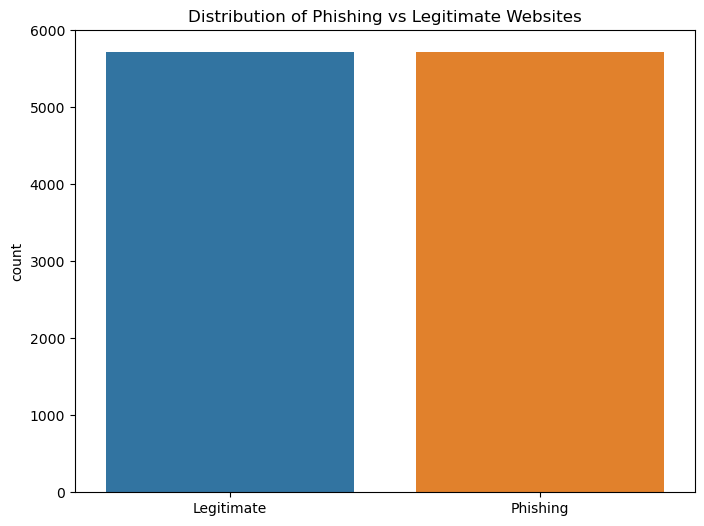

In [49]:
# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Phishing vs Legitimate Websites')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.show()

In [50]:
# # Select numeric columns for correlation analysis
# numeric_columns = x.select_dtypes(include=[np.number]).columns

In [51]:
# # Correlation heatmap (only for numeric features)
# plt.figure(figsize=(20, 16))
# sns.heatmap(x[numeric_columns].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Feature Correlation Heatmap (Numeric Features Only)')
# plt.show()

In [52]:
# 1. Correlation Analysis
correlation_matrix = x.corr()

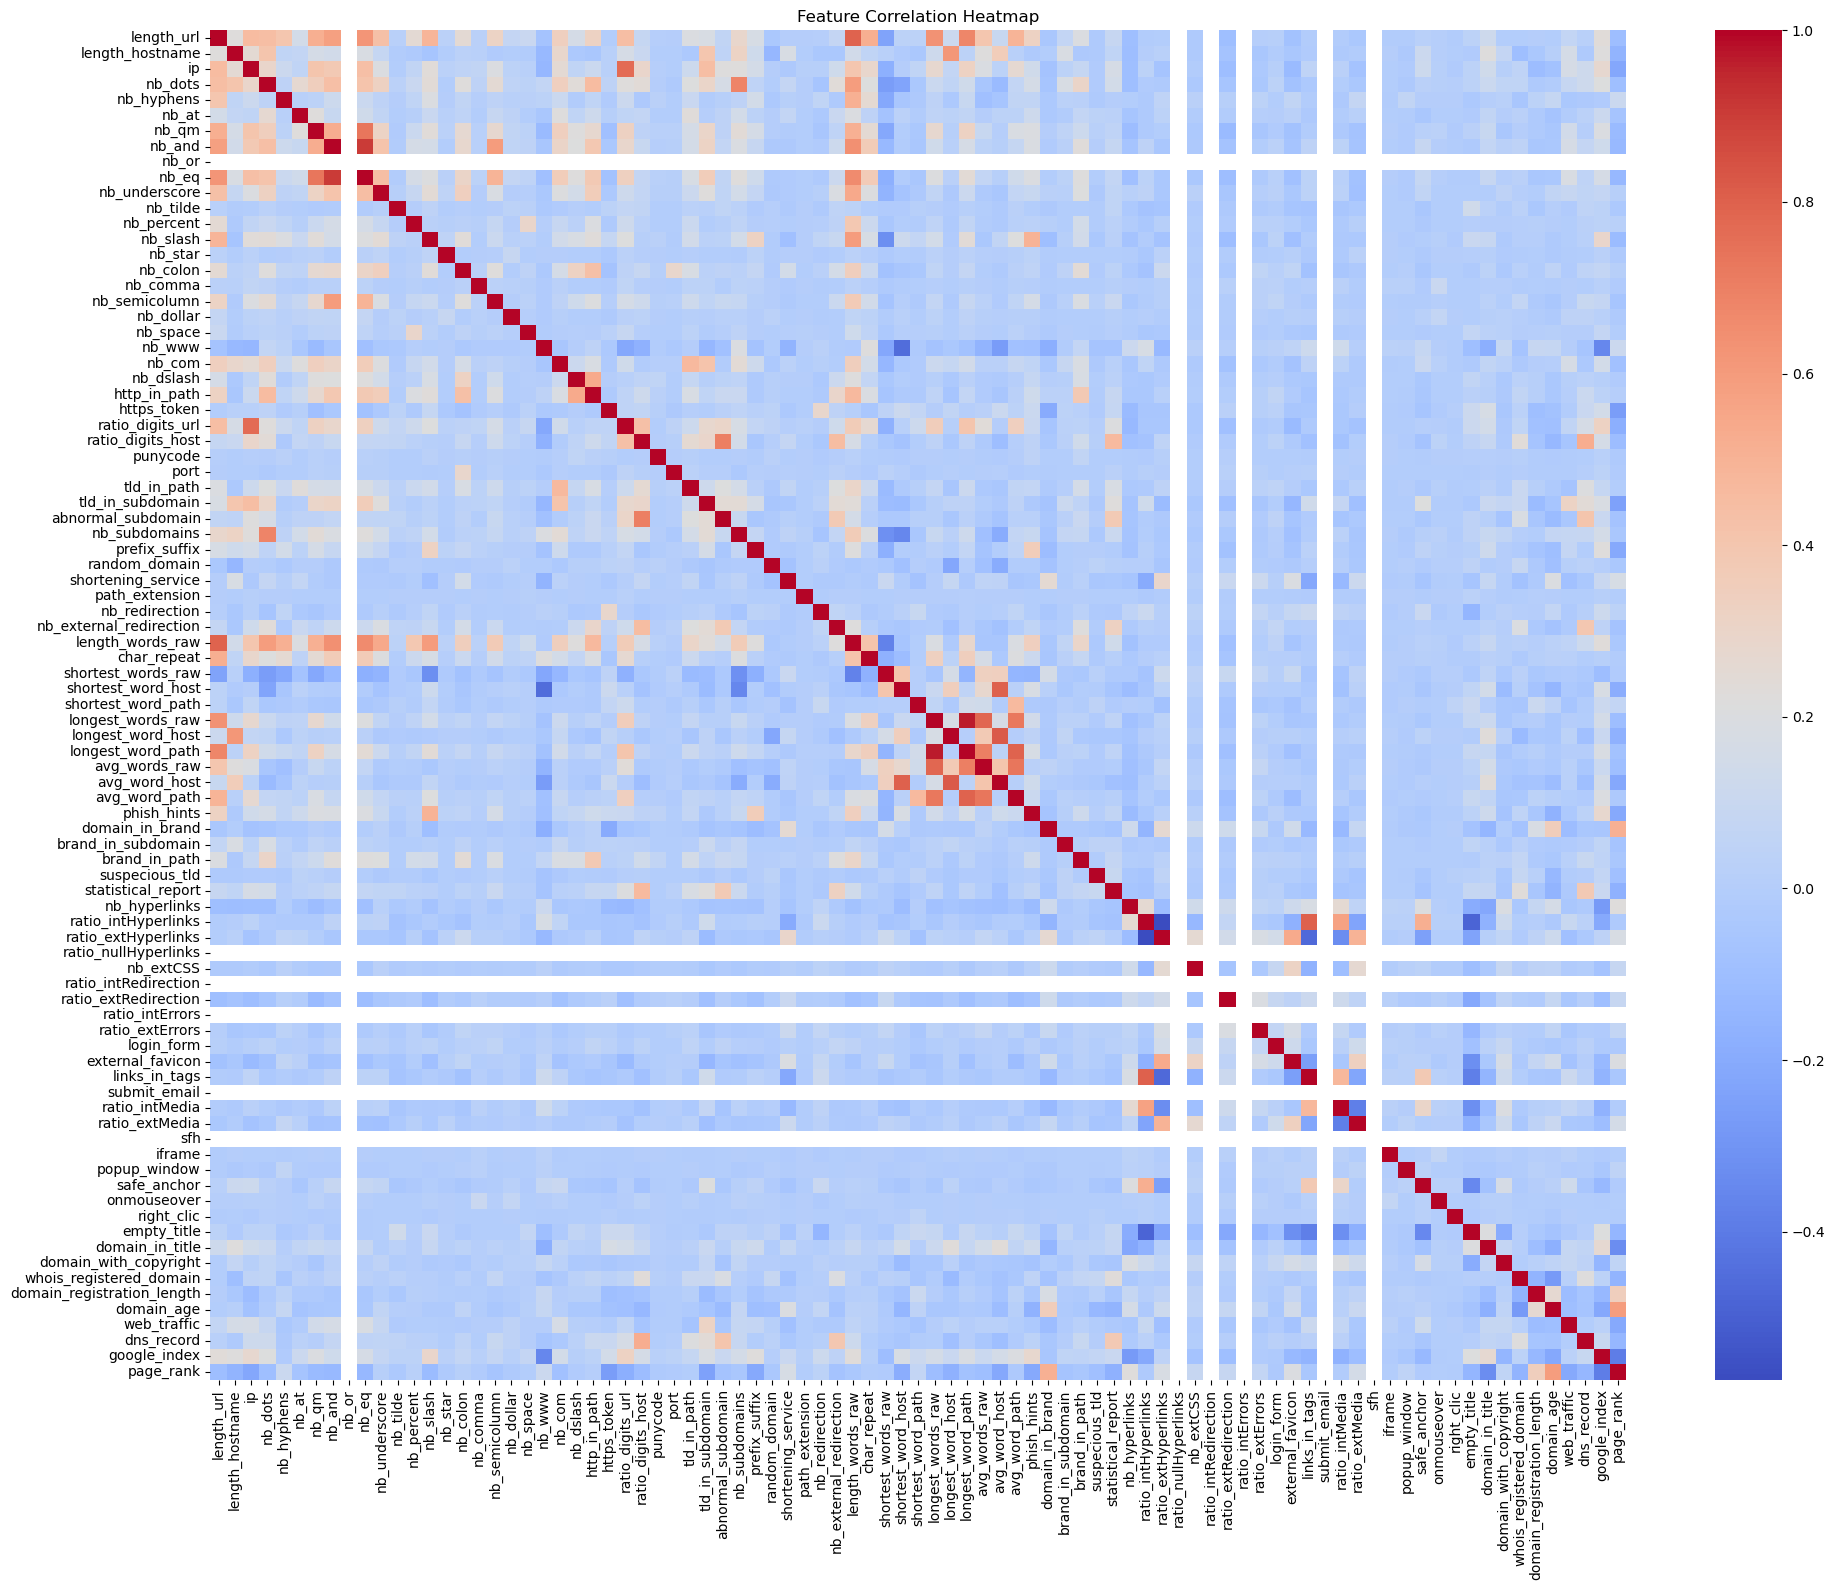

In [53]:
# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## Feature Selection

In [54]:
# Identify highly correlated features
high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

In [55]:
print("Highly correlated feature pairs:")
for pair in high_corr_features:
    print(pair)

Highly correlated feature pairs:
('nb_and', 'nb_eq')
('shortest_word_host', 'avg_word_host')
('longest_words_raw', 'longest_word_path')
('longest_word_host', 'avg_word_host')


In [56]:
# 2. Feature Importance from Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x, y)

RandomForestClassifier(random_state=42)

In [57]:
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

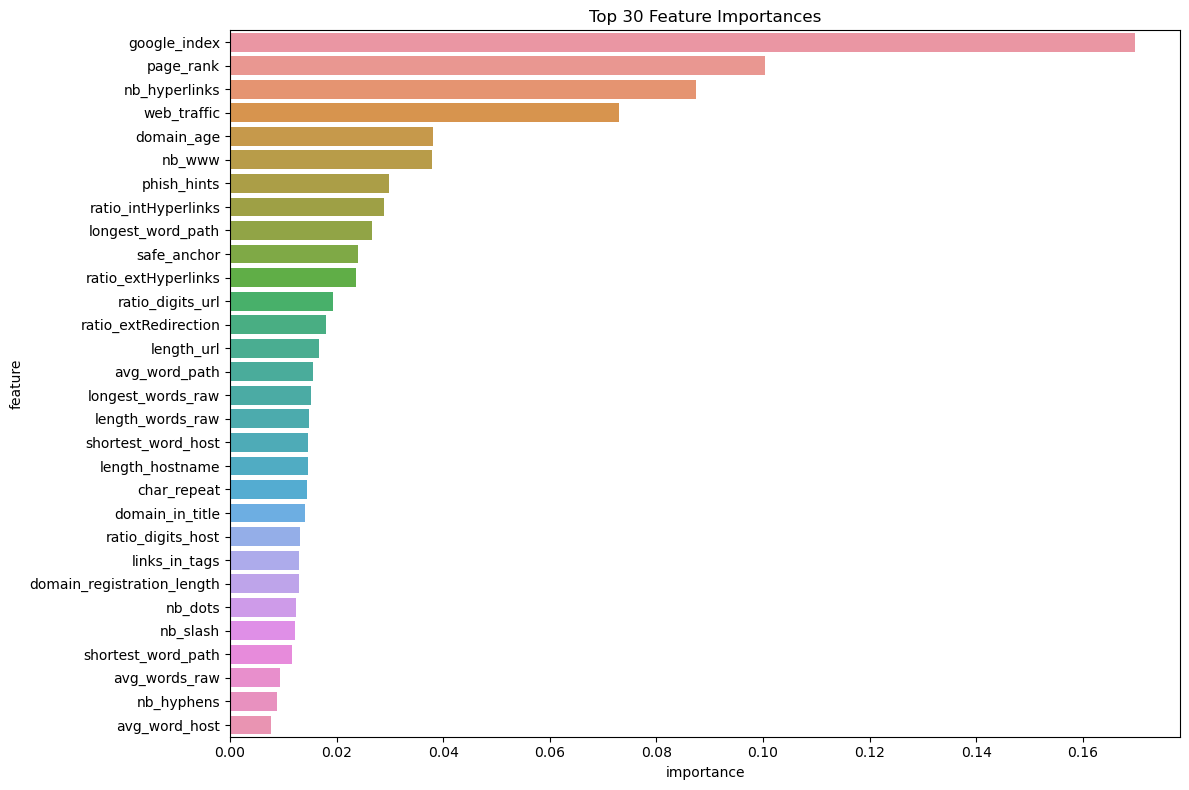

In [58]:
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 30 Feature Importances')
plt.tight_layout()
plt.show()

In [59]:
print("\nTop 30 important features from Random Forest:")
print(feature_importance.head(30))


Top 30 important features from Random Forest:
                       feature  importance
85                google_index    0.169744
86                   page_rank    0.100367
56               nb_hyperlinks    0.087397
83                 web_traffic    0.073052
82                  domain_age    0.038080
20                      nb_www    0.037966
50                 phish_hints    0.029911
57         ratio_intHyperlinks    0.028965
46           longest_word_path    0.026592
74                 safe_anchor    0.023949
58         ratio_extHyperlinks    0.023629
25            ratio_digits_url    0.019259
62        ratio_extRedirection    0.018042
0                   length_url    0.016660
49               avg_word_path    0.015603
44           longest_words_raw    0.015139
39            length_words_raw    0.014894
42          shortest_word_host    0.014563
1              length_hostname    0.014563
40                 char_repeat    0.014384
78             domain_in_title    0.014140
26     

In [60]:
# 3. Select K Best Features
k_best = SelectKBest(score_func=f_classif, k=30)
k_best.fit(x, y)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=30)

In [61]:
selected_features = x.columns[k_best.get_support()]


In [62]:
print("\nTop 30 features selected by SelectKBest:")
print(selected_features)


Top 30 features selected by SelectKBest:
Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_eq',
       'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'prefix_suffix', 'length_words_raw',
       'shortest_word_host', 'longest_words_raw', 'longest_word_path',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'links_in_tags', 'ratio_intMedia', 'safe_anchor',
       'empty_title', 'domain_in_title', 'domain_with_copyright', 'domain_age',
       'google_index', 'page_rank'],
      dtype='object')


In [63]:
# Combine the results
rf_features = set(feature_importance['feature'][:30])
kb_features = set(selected_features)
final_features = rf_features.union(kb_features)

In [64]:
print("\nFinal selected features:")
print(final_features)
print(f"\nTotal number of selected features: {len(final_features)}")


Final selected features:
{'nb_eq', 'ratio_digits_host', 'web_traffic', 'links_in_tags', 'nb_slash', 'length_url', 'ratio_extHyperlinks', 'prefix_suffix', 'longest_word_path', 'length_words_raw', 'page_rank', 'length_hostname', 'domain_in_title', 'nb_www', 'ratio_extRedirection', 'ratio_intMedia', 'domain_registration_length', 'google_index', 'shortest_word_host', 'phish_hints', 'nb_dots', 'avg_word_host', 'nb_qm', 'nb_hyperlinks', 'ratio_intHyperlinks', 'shortest_word_path', 'ip', 'domain_with_copyright', 'empty_title', 'ratio_digits_url', 'safe_anchor', 'avg_words_raw', 'nb_hyphens', 'char_repeat', 'domain_age', 'avg_word_path', 'longest_words_raw', 'tld_in_subdomain'}

Total number of selected features: 38


In [65]:
# If more than 30 features are selected, prioritize based on Random Forest importance
if len(final_features) > 30:
    final_features = set(feature_importance['feature'][:30])

In [66]:
print("\nFinal 30 selected features:")
print(final_features)


Final 30 selected features:
{'ratio_digits_host', 'web_traffic', 'links_in_tags', 'nb_slash', 'length_url', 'ratio_extHyperlinks', 'longest_word_path', 'length_words_raw', 'page_rank', 'length_hostname', 'domain_in_title', 'nb_www', 'ratio_extRedirection', 'domain_registration_length', 'google_index', 'shortest_word_host', 'phish_hints', 'nb_dots', 'avg_word_host', 'nb_hyperlinks', 'ratio_intHyperlinks', 'shortest_word_path', 'ratio_digits_url', 'safe_anchor', 'avg_words_raw', 'nb_hyphens', 'char_repeat', 'domain_age', 'avg_word_path', 'longest_words_raw'}
